# I Deriving PCA from the SVD 

This homework problem will highlight the relationship between singular value decomposition and principal component analysis. 

1. Implement principal component analysis for an arbitrary dataset: you may use an implementation of the singular value decomposition.

2. Using the ovarian_cancer.csv dataset from the last homework, apply your implementation of PCA. Plot singular values and plot the fraction of variance corresponding to each singular value. 

3. Find the two first principal components. Note that the ith principal component is calculated by: 


where  is the covariance matrix of the our observations . 

Plot the reduced data projection onto the first two principal components. Color data points by their status (cancer vs normal). 

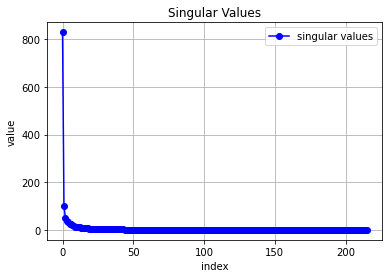

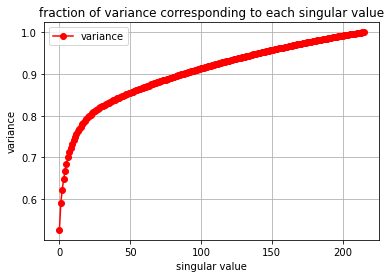

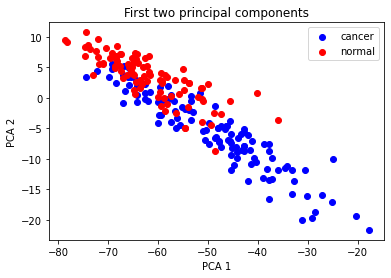

In [18]:
from numpy.linalg import svd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#### PART 1 ######
def PCA(X):
    # SVD Method
    C = np.cov(X)
    eigval, eigvec = np.linalg.eigh(C)
    U,S,V_t = svd(X)
    s = np.diag(S)
    T = np.dot(U,s)
    return T, S, U, C


#### PART 2 ######
df = pd.read_csv('ovarian_cancer.csv')
del df['status']
del df['patients']

df_mean = df.mean(axis=0)
X_bar = df_mean
B = df - X_bar

T, singular_values, unitary_vector, cov_matrix = PCA(df)
fig1 = plt.figure()
plt.plot(singular_values, '-o', color='b', label='singular values')
plt.xlabel("index")
plt.ylabel("value")
plt.title('Singular Values')
plt.legend()
plt.grid()
plt.savefig('data/fig1.png')
plt.show()
plt.plot(np.cumsum(singular_values)/np.sum(singular_values), '-o',  color='r', label='variance')
plt.xlabel("singular value")
plt.ylabel("variance")
plt.title('fraction of variance corresponding to each singular value')
plt.legend()
plt.grid()
plt.savefig('data/fig2.png')
plt.show()


#### PART 3 ######
for i in range(0,215):
    if i <= 119:
        if i == 0:
            plt.scatter(T[i,0], T[i,1], color='b', label = 'cancer')
        plt.scatter(T[i,0], T[i,1], color='b')
    else:
        if i == 120:
            plt.scatter(T[i,0], T[i,1], color='r', label = 'normal')
        plt.scatter(T[i,0], T[i,1], color='r')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title('First two principal components')
plt.legend()
plt.savefig('data/fig3.png')
plt.show()




Our image data:


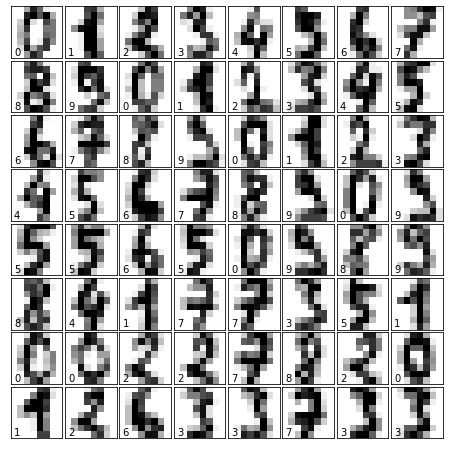

Contains 64 features


In [42]:
from numpy.linalg import svd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler


##### PART 1 ######

digits = load_digits()
print("Our image data:")
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()





# II Signal decomposition.  

In this problem, we aim to recover unobserved signal sources from observed signal mixtures, exploiting only the assumption that there exists mutual independence between unobserved signal sources. Signal separation has applications in sound engineering, telecommunication, neuroscience and many other areas of science and engineering. 

1. Download mixed_signals.csv from Canvas.  The rows represent time and the columns correspond to an observed signal mixture. Plot each signal over time.

2. Recover unobserved source signals from observed mixed signals.  You may use methods such as ICA, PCA, and other dimensionality reduction algorithms.  Plot recovered source signals over time. Compare other results to PCA and discuss. 

3.  Write down the equations for each of the recovered source signals.  These are known mathematical functions. 

,0,1,2,3,4,5
0,-11.531085,0.381679,-0.350922,1.761082,0.054441,-0.239944
1,-7.818799,0.913715,-0.549526,1.223216,-0.208913,-0.523910
2,-11.494520,1.525517,-1.198895,1.311090,-0.456732,-0.446184
3,-9.214925,1.286272,-0.911562,1.185054,-0.369832,-0.506849
4,-7.570759,0.981909,-0.670734,1.112027,-0.321771,-0.584456
...,...,...,...,...,...,...
3995,8.040466,-0.948098,0.511783,-1.427336,0.262679,0.780141
3996,5.183359,-1.197802,0.397516,-1.072589,0.160620,0.670804
3997,10.142810,-0.843531,0.532974,-1.776014,0.277691,0.879986
3998,9.027794,-1.542411,0.923884,-1.232707,0.354204,0.570621


r


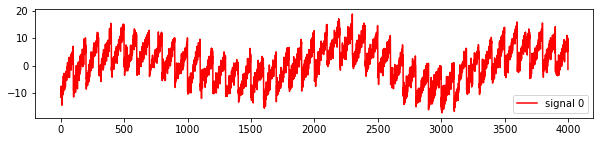

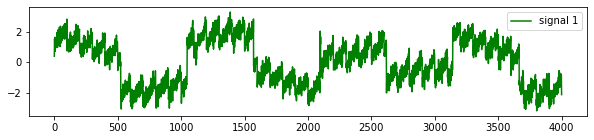

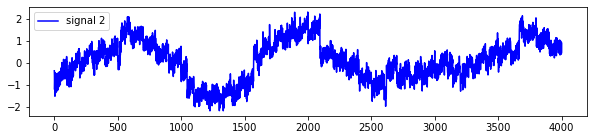

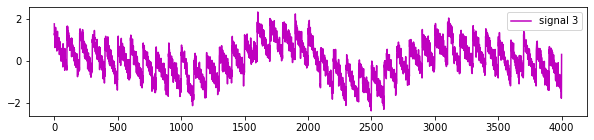

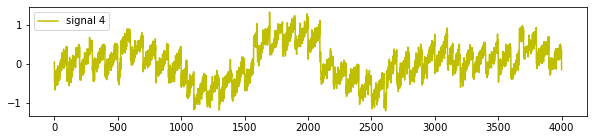

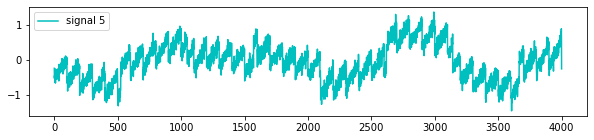

,0,1,2,3
0,0.020394,0.001244,-0.003774,0.031791
1,0.020016,-0.010630,-0.004211,0.020107
2,0.023778,-0.014846,0.004932,0.026056
3,0.021666,-0.014089,0.000766,0.021534
4,0.021811,-0.013232,-0.002881,0.016700
...,...,...,...,...
3995,-0.025878,0.015868,0.014736,-0.018708
3996,-0.016258,0.016428,0.014421,-0.017462
3997,-0.032094,0.015556,0.016908,-0.022192
3998,-0.020818,0.017861,0.006323,-0.023120


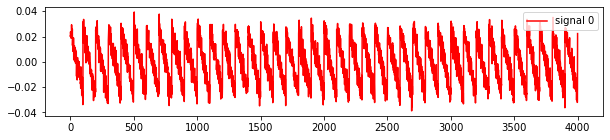

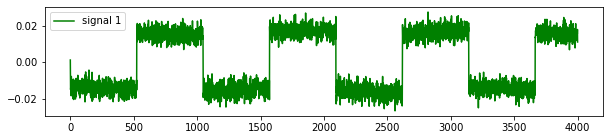

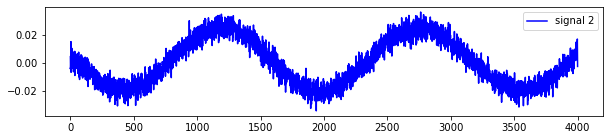

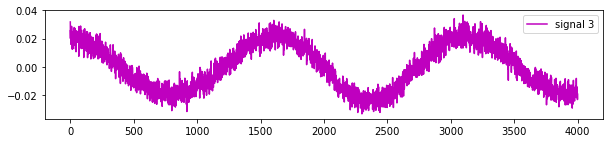

,0,1,2,3
0,-12.229869,0.084171,-1.083058,0.097192
1,-8.509823,0.833109,-0.907766,-0.238210
2,-12.218532,1.614876,-0.780996,-0.220075
3,-9.921318,1.325179,-0.800360,-0.264515
4,-8.264355,0.988403,-0.802653,-0.357422
...,...,...,...,...
3995,7.519357,-0.732121,1.354691,0.506176
3996,4.640473,-0.976410,1.264349,0.330464
3997,9.638000,-0.570948,1.559496,0.586368
3998,8.514915,-1.448225,1.145576,0.305330


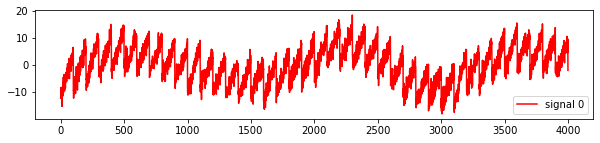

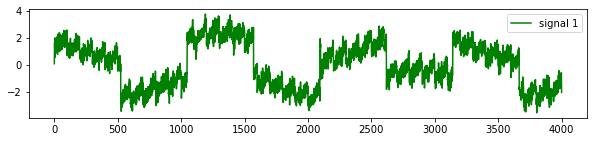

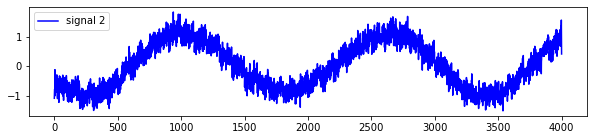

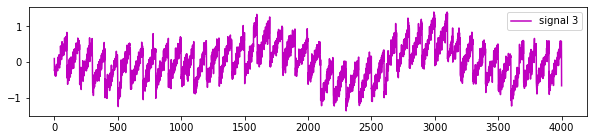

In [17]:
from numpy.linalg import svd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

df = pd.read_csv('mixed_signals.csv')
del df['Unnamed: 0']
display(df)

x = np.linspace(0,4000,4000)

col = ['0','1','2','3','4','5']
col2 = ['0','1','2','3']
colors = ['r','g','b','m','y','c']
colors2 = ['r','g','b','m']
print(colors[0])
k = 0
for i in col:
    plt.figure(figsize = (10,2))
    plt.plot(x, df[i],label = 'signal ' + i, color=colors[k])
    plt.legend()
    k +=1
    plt.savefig('data/fig2.'+i+'.png')
plt.show()
    
#pca = PCA(n_components=6)
#pca = pca.fit_transform(df)
#df1 = pd.DataFrame(pca, columns = ['0','1','2','3','4','5'])
#display(df1)


ICA = FastICA(n_components=4)
IndependentComponentValues=ICA.fit_transform(df)


df1 = pd.DataFrame(IndependentComponentValues, columns = ['0','1','2','3'])
display(df1)

k = 0
for i in col2:
    plt.figure(figsize = (10,2))
    plt.plot(x, df1[i],label = 'signal ' + i, color=colors[k])
    plt.legend()
    k += 1
    plt.savefig('data/fig3.'+i+'.png')
plt.show()
    
PCA = PCA(n_components=4)
PrincipalComponentValues=PCA.fit_transform(df)
df2 = pd.DataFrame(PrincipalComponentValues, columns = ['0','1','2','3'])
display(df2)

k = 0
for i in col2:
    plt.figure(figsize = (10,2))
    plt.plot(x, df2[i],label = 'signal ' + i, color=colors[k])
    plt.legend()
    k += 1
    plt.savefig('data/fig4.'+i+'.png')
plt.show()

    